1. 导入必要的库
2. 设置参数
3. 定义内核
4. 加载图像并绘制它
5. 重新设置图像格式
6. 应用卷积层并绘制输出图像
7. 应用激活层并绘制输出图像
8. 应用池化层并绘制输出图像

In [1]:
imgpath=r"C:\Users\2022\Desktop\Cache_-6a95da2df6c6902.jpg"

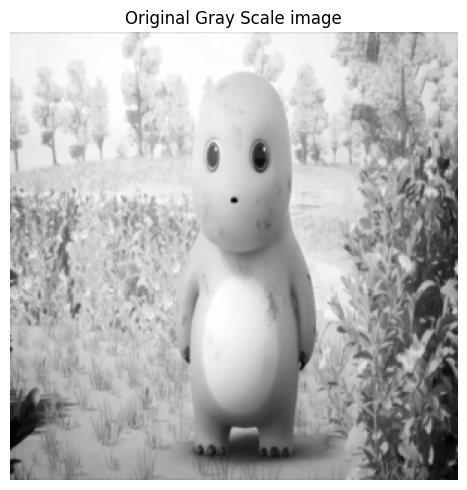

Image shape: torch.Size([1, 1, 300, 300])
Kernel shape: torch.Size([1, 1, 3, 3])


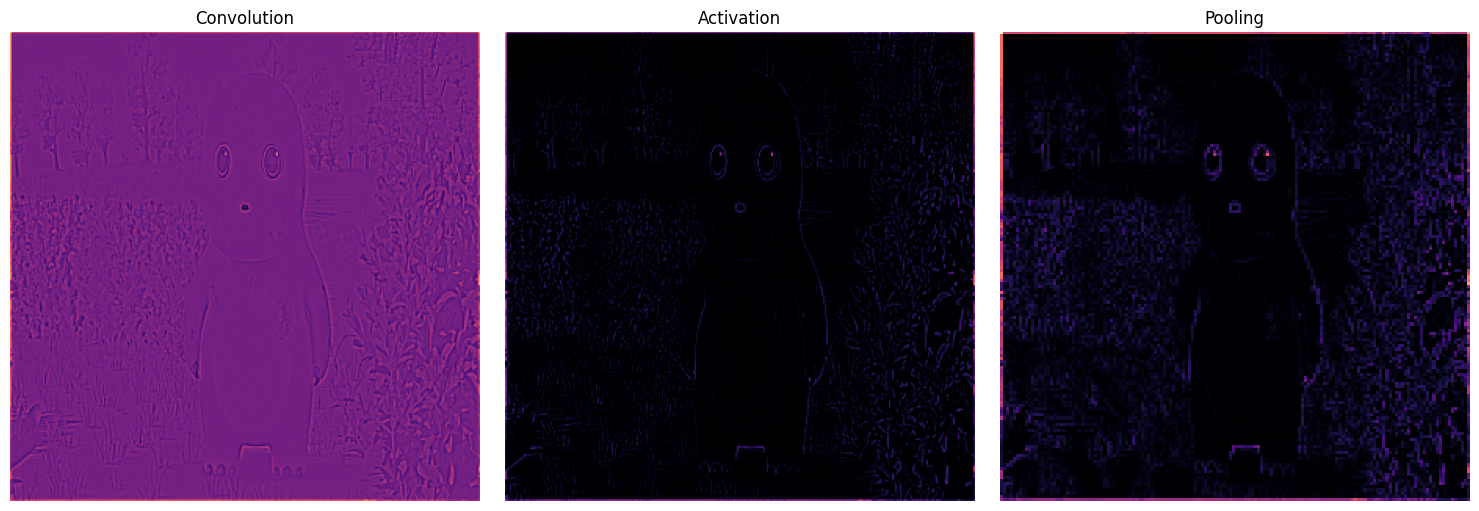

Original image shape: torch.Size([1, 1, 300, 300])
After convolution: torch.Size([1, 1, 300, 300])
After activation: torch.Size([1, 1, 300, 300])
After pooling: torch.Size([1, 1, 150, 150])


In [2]:
# import the necessary libraries
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

# set the param 
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel (edge detection kernel)
kernel = torch.tensor([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]], dtype=torch.float32)

# load and preprocess the image
image = Image.open(imgpath).convert('L')  # Convert to grayscale
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor()
])
image_tensor = transform(image)

# plot the original image
img = image_tensor.squeeze().numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

# Reformat for convolution
# Add batch dimension: (1, 1, H, W)
image_batch = image_tensor.unsqueeze(0)
# Reshape kernel for conv2d: (out_channels, in_channels, H, W)
kernel_conv = kernel.unsqueeze(0).unsqueeze(0)

print(f"Image shape: {image_batch.shape}")
print(f"Kernel shape: {kernel_conv.shape}")

# Convolution layer
image_filter = F.conv2d(image_batch, kernel_conv, padding='same')

plt.figure(figsize=(15, 5))

# Plot the convolved image
plt.subplot(1, 3, 1)
plt.imshow(image_filter.squeeze().detach().numpy())
plt.axis('off')
plt.title('Convolution')

# Activation layer (ReLU)
image_detect = F.relu(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(image_detect.squeeze().detach().numpy())
plt.axis('off')
plt.title('Activation')

# Pooling layer (Max Pooling)
image_condense = F.max_pool2d(image_detect, kernel_size=2, stride=2)

plt.subplot(1, 3, 3)
plt.imshow(image_condense.squeeze().detach().numpy())
plt.axis('off')
plt.title('Pooling')
plt.show()

# Print output shapes for verification
print(f"Original image shape: {image_batch.shape}")
print(f"After convolution: {image_filter.shape}")
print(f"After activation: {image_detect.shape}")
print(f"After pooling: {image_condense.shape}")